# IMU Acceleration & Angular Velocity Simulation  
## Vehicles & Sensors — Motion Modeling

**Name:** Priyam Gupta        
**Neptun code:** KXHGEA

![Problem Statement](problem_statement.png)

This notebook simulates the **longitudinal acceleration**, **lateral acceleration**,  
and **angular velocity** measured by an IMU mounted on a car performing the motion shown below:

1. **Accelerate** from 0 -> 20 m/s in 10 s  
2. **Straight segment** at constant speed (20 m/s for 10 s)  
3. **U-turn** of radius 100 m at constant speed  
4. **Straight segment** again (20 m/s for 10 s)  
5. **Hard brake** to stop in 1 meter

The IMU axes:

- **x-axis:** forward (longitudinal)  
- **y-axis:** left (lateral)  
- **z-axis:** vertical (ignored)

We compute and plot:

- $a_x(t)$: longitudinal acceleration
- $a_y(t)$: lateral (centripetal) acceleration
- $\omega(t)$: yaw angular velocity

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Phase 1 — Acceleration (0 → 20 m/s in 10 s)

The longitudinal acceleration is:

$$
a_x = \frac{\Delta v}{\Delta t} = \frac{20 - 0}{10} = 2\ \text{m/s}^2
$$

Since motion is straight:

$$
a_y = 0, \quad \omega = 0
$$

In [10]:
# Phase 1: Acceleration
t1 = np.linspace(0, 10, 100)        # 10 seconds, 200 samples
a_long = 2.0                        # Constant = Longitudinal acceleration in m/s^2
const_vel = 20.0                    # Constant velocity after acceleration in m/s

v1 = a_long * t1                    # Velocity during acceleration phase, v = a * t

ax1 = np.full_like(t1, a_long)      # Longitudinal acceleration
ay1 = np.zeros_like(t1)             # No lateral acceleration
omega1 = np.zeros_like(t1)          # No yaw rate (angular velocity)

## Phase 2 — Straight Motion at Constant Speed (20 m/s for 10 s)

Since speed is constant:

$$
a_x = 0, \quad a_y = 0, \quad \omega = 0
$$

In [11]:
# Phase 2: Constant Speed
t2 = np.linspace(10, 20, 100)       # 10 seconds, 200 samples
v2 = np.full_like(t2, const_vel)    # Constant velocity of 20 m/s

ax2 = np.zeros_like(t2)             # No longitudinal acceleration
ay2 = np.zeros_like(t2)             # No lateral acceleration
omega2 = np.zeros_like(t2)          # No yaw rate (angular velocity)

## Phase 3 — U-turn (Radius = 100 m, Speed = 20 m/s)

### Angular Velocity

$$
\omega = \frac{v}{R} = \frac{20}{100} = 0.2\ \text{rad/s}
$$

### Lateral (Centripetal) Acceleration

$$
a_y = \frac{v^2}{R} = \frac{20^2}{100} = 4\ \text{m/s}^2
$$

Longitudinal acceleration remains:

$$
a_x = 0
$$

In [12]:
# Phase 3: U-Turn
R = 100.0                           # Radius of the U-turn in meters
v_turn = const_vel                  # Constant speed during U-turn in m/s

omega_turn = v_turn / R             # Yaw rate (angular velocity) during U-turn
ay_turn = v_turn**2 / R             # Lateral acceleration during U-turn

# Duration of U-turn phase (half circle) = pi.R / v
dur3 = (np.pi * R) / v_turn

t3 = np.linspace(20, 20 + dur3, 300)    # U-turn duration, 300 samples

v3 = np.full_like(t3, v_turn)           # Constant velocity during U-turn

ax3 = np.zeros_like(t3)                 # No longitudinal acceleration
ay3 = np.full_like(t3, ay_turn)         # Constant lateral acceleration
omega3 = np.full_like(t3, omega_turn)   # Constant yaw rate (angular velocity)

## Phase 4 — Straight Constant-Speed After Turn

Again:

$$
a_x = 0, \quad a_y = 0, \quad \omega = 0
$$

In [13]:
# Phase 4: Second straight line
t4 = np.linspace(20 + dur3, 30 + dur3, 200)     # 10 seconds, 200 samples
v4 = np.full_like(t4, const_vel)                # Constant velocity of 20 m/s

ax4 = np.zeros_like(t4)                         # No longitudinal acceleration
ay4 = np.zeros_like(t4)                         # No lateral acceleration
omega4 = np.zeros_like(t4)                      # No yaw rate (angular velocity)

## Phase 5 — Hard Braking (Stop in 1 Meter)

Kinematic equation:

$$
v_f^2 = v_0^2 + 2ad
$$

where,
- $v_f$ = 0
- d = 1
- $v_0$ = 20 $\text{m/s}^2$

So:
$$
        =>      0 = 20^2 + 2(a)(1)
$$

$$
a = -\frac{v^2}{2d}
 = -\frac{400}{2}
 = -200\ \text{m/s}^2
$$

Stopping time:

$$
t = \frac{v}{|a|} = \frac{20}{200} = 0.1\ \text{s}
$$

In [25]:
# Phase 5: Hard Braking
d = 1.0                                         # Distance to stop in meters

a_brake = -(const_vel)**2 / (2 * d)             # Deceleration to stop in 1 meter
t5_end = const_vel / abs(a_brake)               # Time to stop

t5 = np.linspace(30 + dur3, 30 + dur3 + t5_end, 100)    # Time to stop, 100 samples
v5 = const_vel + a_brake * (t5 - t5[0])                 # Velocity during braking phase

ax5 = np.full_like(t5, a_brake)             # Constant longitudinal deceleration
ay5 = np.zeros_like(t5)                     # No lateral acceleration
omega5 = np.zeros_like(t5)                  # No yaw rate (angular velocity)

## Combine All Segments Into Complete Signals

In [26]:
# Concatenate all segments
t = np.concatenate([t1, t2, t3, t4, t5])
ax = np.concatenate([ax1, ax2, ax3, ax4, ax5])
ay = np.concatenate([ay1, ay2, ay3, ay4, ay5])
omega = np.concatenate([omega1, omega2, omega3, omega4, omega5])

# Plot 1 — Longitudinal Acceleration $a_x(t)$

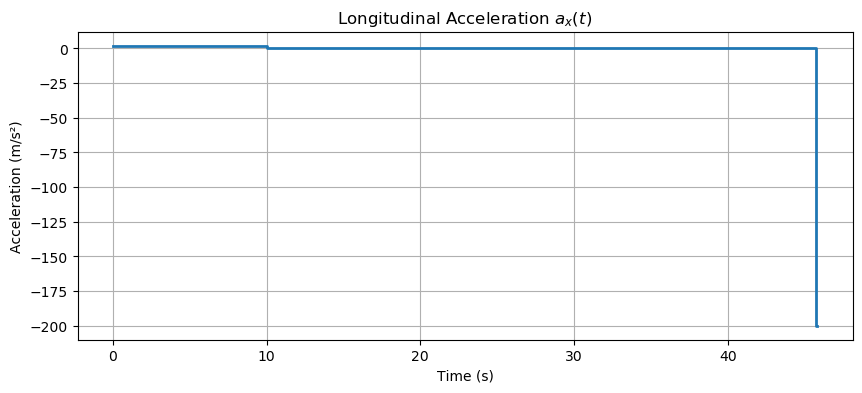

In [27]:
plt.figure(figsize=(10,4))
plt.plot(t, ax, linewidth=2)
plt.title("Longitudinal Acceleration $a_x(t)$")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.grid(True)
plt.show()

# Plot 2 — Lateral Acceleration $a_y(t)$

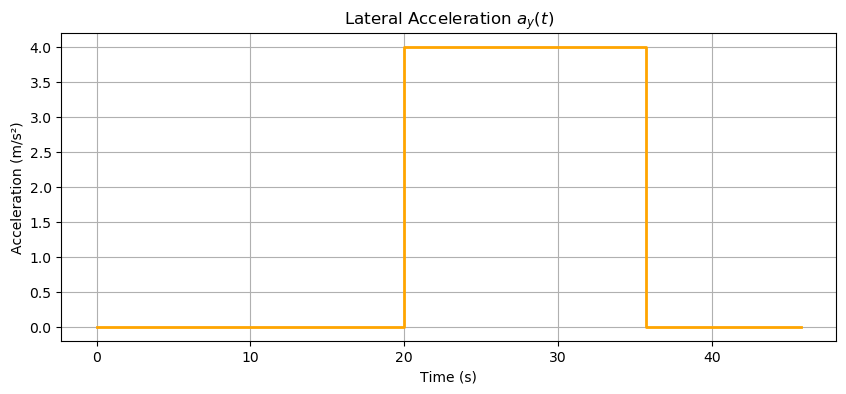

In [28]:
plt.figure(figsize=(10,4))
plt.plot(t, ay, linewidth=2, color='orange')
plt.title("Lateral Acceleration $a_y(t)$")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.grid(True)
plt.show()

# Plot 3 — Angular Velocity $\omega(t)$

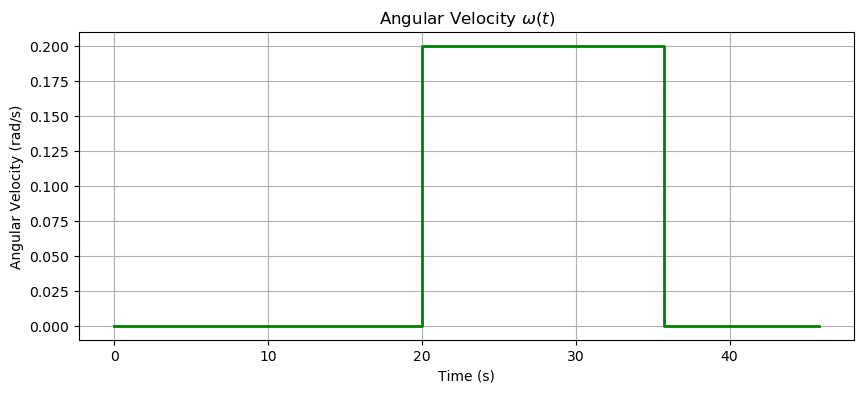

In [29]:
plt.figure(figsize=(10,4))
plt.plot(t, omega, linewidth=2, color='green')
plt.title("Angular Velocity $\\omega(t)$")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.grid(True)
plt.show()